# BLACK FRIDAY DATASET

## 1) Problem Statement
* The Black Friday Dataset consist of the users and products related features.
* We need to Estimate the Purchase value based on the Features. 
* Predit how much customers customers will spend on Black Friday.

## 2) Data Collection
* The Black Friday data is collected from the Kaggle.
* It consists of 12 columns and 550068 records.

## importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from six.moves import urllib
import os
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data.shape

(550068, 12)

#  null values

In [7]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [19]:
num_features=[col for col in data.columns if data[col].dtype!='O']  #data[i].dtpye='int' or data[i].dtype='float'
catg_features=[col for col in data.columns if data[col].dtype=='O']
print("we have {} numerical columns :{}".format(len(num_features),num_features))
print("we havee {} categorical columns:{}".format(len(catg_features),catg_features))

we have 7 numerical columns :['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
we havee 5 categorical columns:['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


## 3) Exploratory Data Analysis

In [9]:
for col in catg_features:
    print(data[col].value_counts(normalize=True) * 100)
    print('---------------------------')

P00265242    0.341776
P00025442    0.293600
P00110742    0.293055
P00112142    0.283965
P00057642    0.267240
               ...   
P00314842    0.000182
P00298842    0.000182
P00231642    0.000182
P00204442    0.000182
P00066342    0.000182
Name: Product_ID, Length: 3631, dtype: float64
---------------------------
M    75.310507
F    24.689493
Name: Gender, dtype: float64
---------------------------
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64
---------------------------
B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64
---------------------------
1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64
---------------------------


In [10]:
data['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

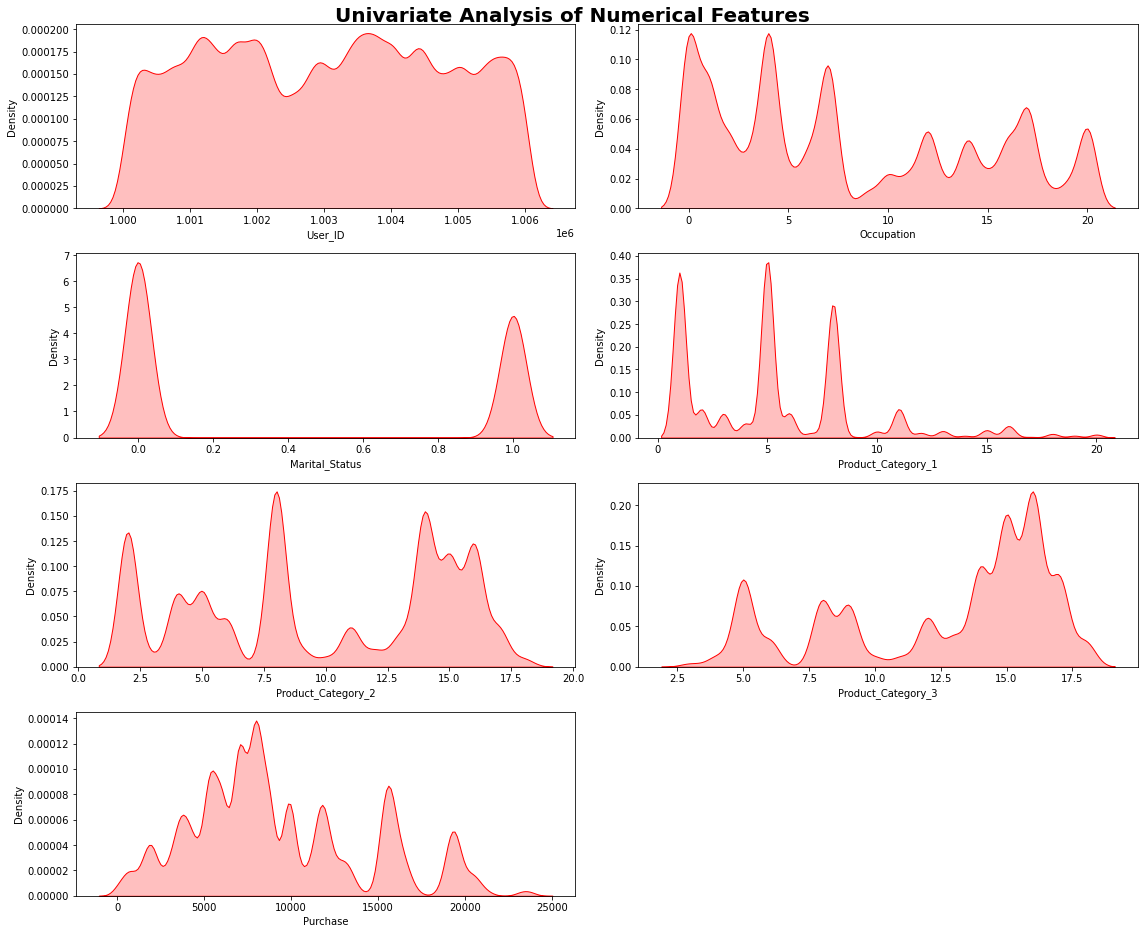

In [11]:
plt.figure(figsize=(16, 16)) # figure size of the size
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold')

for i in range(0, len(num_features)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=data[num_features[i]],shade=True, color='r')
    plt.xlabel(num_features[i])
    plt.tight_layout()

ValueError: num must be 1 <= num <= 4, not 5

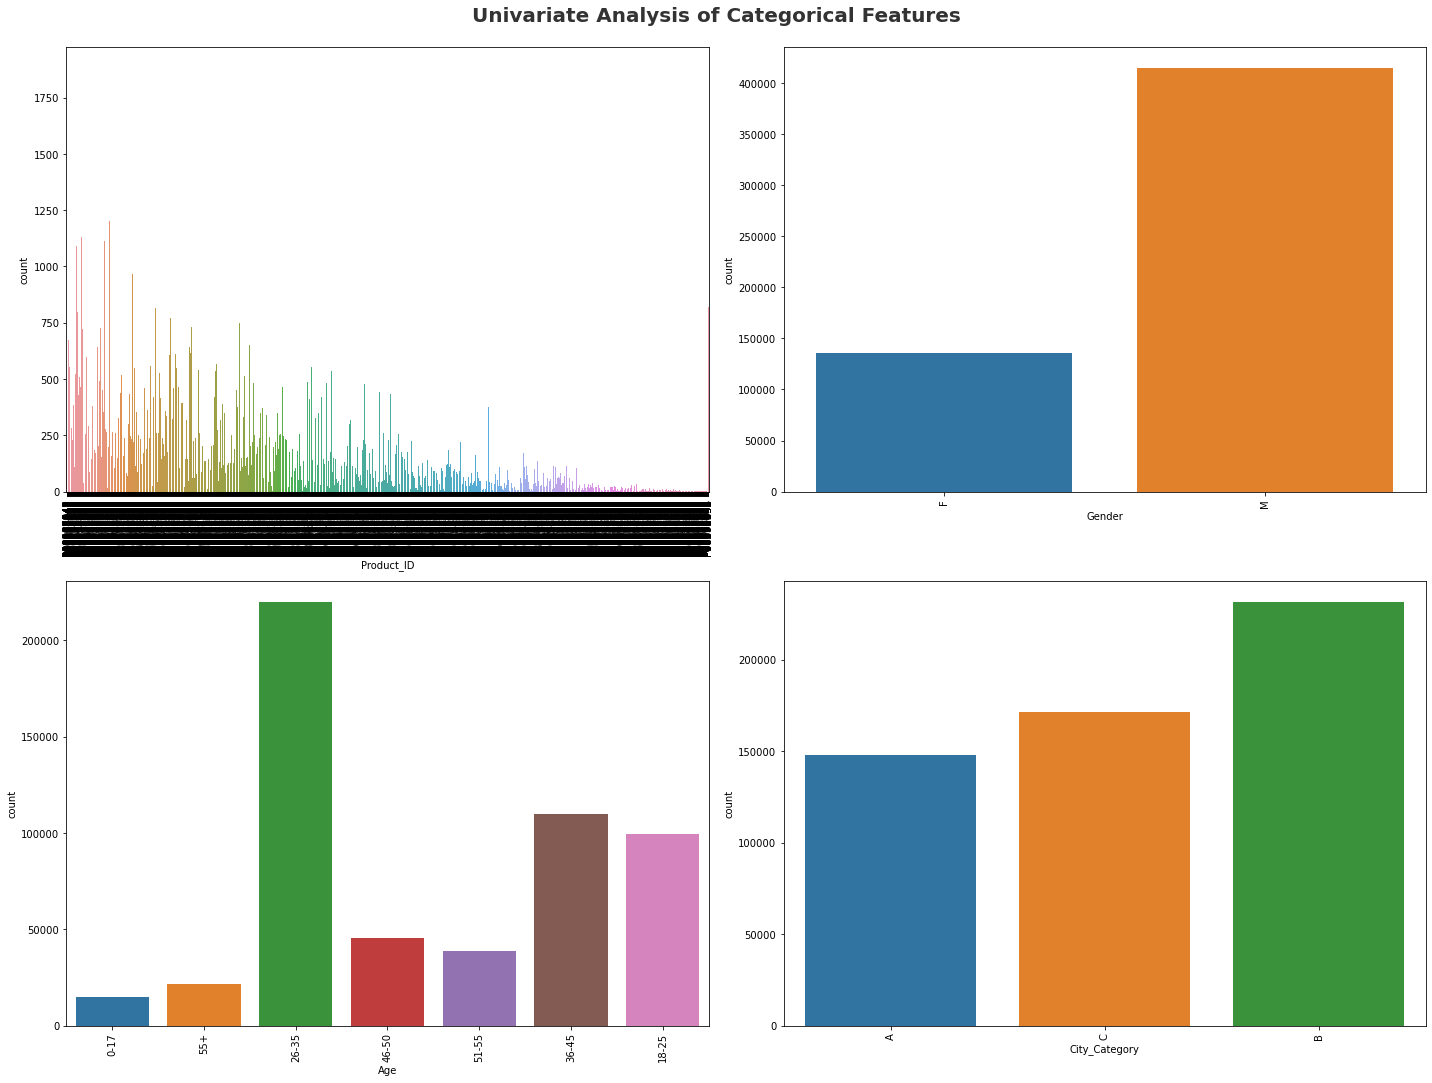

In [12]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=data[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [13]:
# df[(list(df.columns)[1:])].corr()
cols=list(data.columns[0:])
corr=data[cols].corr()
corr

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


<AxesSubplot:>

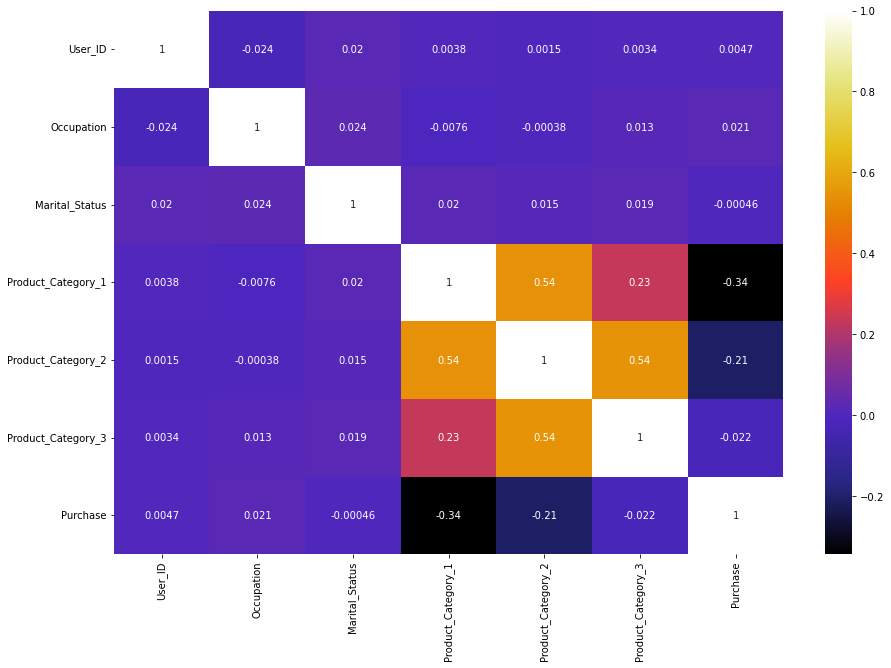

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(corr, cmap="CMRmap", annot=True)

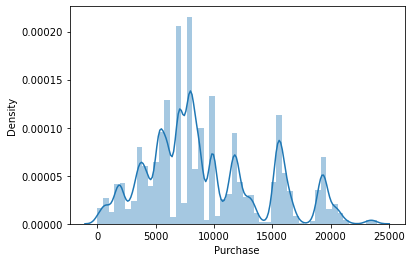

In [15]:
sns.distplot(data['Purchase'].dropna())
plt.show()

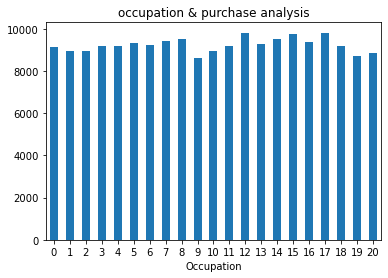

In [16]:
data.groupby("Occupation").mean()["Purchase"].plot(kind='bar')
plt.title('occupation & purchase analysis')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

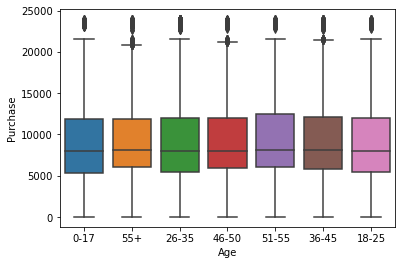

In [20]:
sns.boxplot(x=data["Age"],y=data["Purchase"])
#It represents The min and max purchase w.r.t age